# Setup

### Activate inline plotting

In [1]:
%pylab inline
import sys
sys.path.insert(0, '..')

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

### Import Dataset(s)

In [3]:
from data import Dataset, Dataset_SimChen

In [4]:
signal = Dataset('../data/signal.root')
rhos_SG, phis_SG = signal.get_wires_rhos_and_phis()

### Drawing Function(s)

In [5]:
def setup_plot_for_detector(size=(10, 10)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)   

### Distribution of Signal Hits by Radius

In [6]:
used_events = signal.n_events
max_radius = np.zeros(used_events)

for r_adj in range(1,20):
    radius = 63 + float(7.2)/r_adj
    n_events_excluded = 0
    for event in range(used_events):
        signal_evnts = where(signal.get_hit_types(event) == 1)

        max_radius[event] = max(rhos_SG[signal_evnts])
        if (max_radius[event] >= radius + 10) or max_radius[event] <= radius - 10:
            n_events_excluded += 1
    print float(n_events_excluded)/used_events, radius

0.208662426916 70.2
0.141732485383 66.6
0.141655554416 65.4
0.141655554416 64.8
0.106395527746 64.44
0.106395527746 64.2
0.106395527746 64.0285714286
0.106395527746 63.9
0.161837111499 63.8
0.161837111499 63.72
0.161837111499 63.6545454545
0.161837111499 63.6
0.161837111499 63.5538461538
0.161837111499 63.5142857143
0.161837111499 63.48
0.161837111499 63.45
0.161837111499 63.4235294118
0.161837111499 63.4
0.161837111499 63.3789473684


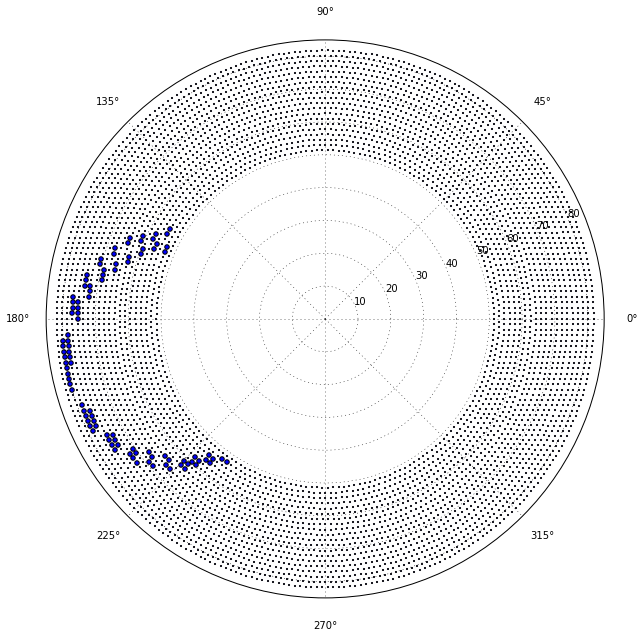

In [7]:
max_r_events = where(max_radius == 80.2)

setup_plot_for_detector()
scatter(phis_SG, rhos_SG, marker='.', s=5)

event = 40
SG_trk = where(signal.get_hit_types(max_r_events[0][event]) == 1)
scatter(phis_SG[SG_trk], rhos_SG[SG_trk], marker='o')

/home/elg112/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


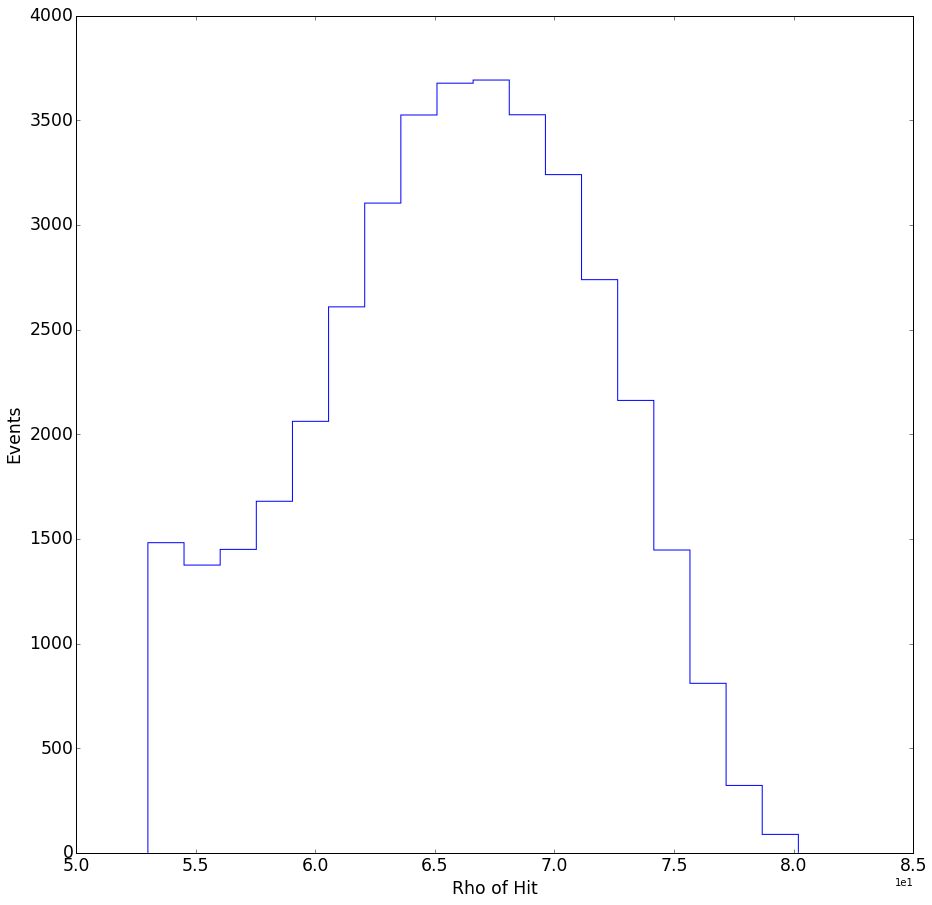

In [8]:
figsize(15,15)
plt.xticks(label='Distribution of Signal Hits', fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('Rho of Hit', fontsize='xx-large')
plt.ylabel('Events', fontsize='xx-large')
plt.hist(max_radius,bins=18,histtype='step')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(fontsize='xx-large')
